# UCR Time Series Classification Data

Download the [UCR time series classification](https://www.cs.ucr.edu/%7Eeamonn/time_series_data_2018/) datasets

In [36]:
import os
import sys
import urllib
import zipfile
import tarfile
import numpy as np
import pandas as pd
import importlib
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_defaults()
%matplotlib inline

In [24]:
# Add the parent notebook folder to the modules path
parent = '../'
if parent not in sys.path: sys.path.append(parent)

In [25]:
import utils
importlib.reload(utils)

<module 'utils' from '../utils.py'>

In [42]:
# constants
DATA = Path('./data/ucr')
DATA.mkdir(parents=True, exist_ok=True)

UCR = DATA / "UCRArchive_2018"

In [39]:
def download_url(url, root, filename=None):
    if not filename:
        filename = os.path.basename(url)
    fpath = os.path.join(root, filename)
    os.makedirs(root, exist_ok=True)
    try:
        urllib.request.urlretrieve(url, fpath)
    except (urllib.error.URLError, IOError) as e:
        if url[:5] == 'https':
            url = url.replace('https:', 'http:')
            urllib.request.urlretrieve(url, fpath)

def unzip(file, root, password=None):
    if file.endswith("tar.gz"):
        tar = tarfile.open(file, "r:gz")
        tar.extractall(path=root)
        tar.close()
    if file.endswith("tar"):
        tar = tarfile.open(file, "r:")
        tar.extractall(path=root)
        tar.close()
    if file.endswith("zip"):
        with zipfile.ZipFile(file, 'r') as z:
            if password is not None:
                z.setpassword(password)
            z.extractall(root)

In [38]:
url = 'https://www.cs.ucr.edu/%7Eeamonn/time_series_data_2018/UCRArchive_2018.zip'
download_url(url, DATA)

In [31]:
!ls {DATA}

UCRArchive_2018.zip


In [41]:
# unnecessarily requires a password to unzip
password = b'someone'
unzip(str(DATA / os.path.basename(url)), DATA, password)

In [43]:
UCR_DATASETS = [str(d.name) for d in UCR.glob("*") if d.is_dir()]

In [44]:
UCR_DATASETS

['Haptics',
 'SyntheticControl',
 'Worms',
 'Computers',
 'HouseTwenty',
 'GestureMidAirD3',
 'Chinatown',
 'UWaveGestureLibraryAll',
 'Strawberry',
 'Car',
 'GunPointAgeSpan',
 'GestureMidAirD2',
 'BeetleFly',
 'Wafer',
 'CBF',
 'Adiac',
 'ItalyPowerDemand',
 'Yoga',
 'AllGestureWiimoteY',
 'Trace',
 'PigAirwayPressure',
 'ShapesAll',
 'Beef',
 'GesturePebbleZ2',
 'Mallat',
 'GunPointOldVersusYoung',
 'MiddlePhalanxTW',
 'AllGestureWiimoteX',
 'Meat',
 'Herring',
 'MiddlePhalanxOutlineCorrect',
 'InsectEPGRegularTrain',
 'FordA',
 'SwedishLeaf',
 'InlineSkate',
 'DodgerLoopDay',
 'UMD',
 'CricketY',
 'Missing_value_and_variable_length_datasets_adjusted',
 'WormsTwoClass',
 'SmoothSubspace',
 'OSULeaf',
 'Ham',
 'CricketX',
 'SonyAIBORobotSurface1',
 'ToeSegmentation1',
 'ScreenType',
 'PigArtPressure',
 'SmallKitchenAppliances',
 'Crop',
 'MoteStrain',
 'MelbournePedestrian',
 'ECGFiveDays',
 'Wine',
 'SemgHandMovementCh2',
 'FreezerSmallTrain',
 'UWaveGestureLibraryZ',
 'NonInvasiveF

In [47]:
from collections import namedtuple
DataSet = namedtuple('DataSet',['X_train','y_train','X_test','y_test'])
def load_dataset(ucr_path, name):
    folder = ucr_path / name
    train = pd.read_csv(folder / f"{name}_TRAIN.tsv", header=None, sep="\t").values
    test = pd.read_csv(folder / f"{name}_TEST.tsv", header=None, sep="\t").values
    train, y_train, test, y_test = train[:, 1:], train[:, 0], test[:, 1:], test[:, 0]
    return DataSet(train, y_train, test, y_test)

In [54]:
# load a data
data = load_dataset(UCR, 'ECGFiveDays')

In [60]:
data.X_train.shape, data.X_test.shape

((23, 136), (861, 136))

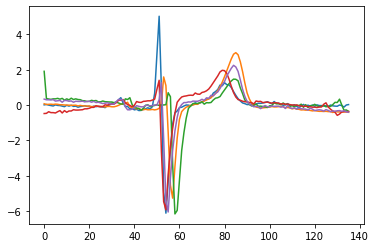

In [59]:
plt.plot(data.X_train[0:5,:].T);